In [85]:
# needs arrays that only consist of ones and zeros


In [86]:
#packages
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [87]:
def foreground_dice(gt,pt):
    #gt and pt are numpy arrays containing pixel intensities
    product1 = np.multiply(gt,pt)
    gt2 = gt-1
    pt2 = pt-1
    product2 = np.multiply(gt2,pt2)
    tp = np.count_nonzero(product1)
    tn = np.count_nonzero(product2)
    all = np.prod(gt2.shape)
    dsc = 2*tp/(tp + all-tn)
    return dsc


In [88]:
def background_dice(gt, pt):
    product1 = np.multiply(gt,pt)
    gt2 = gt-1
    pt2 = pt-1
    product2 = np.multiply(gt2,pt2)
    tn = np.count_nonzero(product1)
    tp = np.count_nonzero(product2)
    all = np.prod(gt2.shape)
    dsc = 2*tp/(tp + all-tn)
    return dsc

In [89]:
def dice(picture1,picture2):
    dice = min(foreground_dice(picture1,picture2),background_dice(picture1,picture2))
    return dice

In [90]:
%pylab
%matplotlib inline
import numpy as np
from scipy import stats
import scipy.ndimage
import matplotlib.pyplot as plt
from images_segmentation import otsu
from images_segmentation import dicescore as dsc

def crop(image, xmin, ymin, xmax, ymax):
    cropped=np.empty([xmax-xmin, ymax-ymin], dtype=float)
    for a,b in np.ndindex(xmax-xmin, ymax-ymin):
        cropped[a,b]=image[a+xmin,b+ymin]
    return cropped

def otsu_i(image, selectivity):
    img=otsu.otsu_thresholding(image, 256)
    #it = np.zeros([img.shape[0],img.shape[1],2])
    #for x, y in np.ndindex(img.shape[0],img.shape[1]):
           # it[x,y,0] += img[i,j]
            #it[x,y,1]+=selectivity
    #return it
    return img

def edge(image, framesize):
    img = np.empty([image.shape[0]+framesize, image.shape[1]+framesize], dtype=int)
    for i,j in np.ndindex(image.shape[0],image.shape[1]):
        img[i,j]=image[i,j]
    figure()
    imshow(img,'gray')
    return img


Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [91]:
#method 1 : mode of foreground and background assignment
def i_sw(image,stepsize,framesize, sensitivity):

    #copy the image so it does not influence the original + add NA corners
    #img=copy(image)
    img=np.empty([image.shape[0]+framesize,image.shape[1]+framesize,])
    img[:]=np.NaN
    #img=copy(image)
    for i,j in np.ndindex(image.shape[0], image.shape[1]):
        img[i,j]=image[i,j]
    
    #create a 3 dimensional null array, the size of the image * 2, we can now save 2 separate values for each pixel
    #array=np.empty([img.shape[0],img.shape[1],2], dtype=float)
    it=np.zeros([img.shape[0],img.shape[1],2])

    #set the first coordinates for iteration over the image
    x=0
    y=0

   

        #iterate crop function with a given size over the picture, while the "window" fits inside the image, 
        #for each window crop the image to window coordinates and perform otsu_i 
    
    while x+framesize<=img.shape[0]:
        while y+framesize<=img.shape[1]:
            #window=crop(img,x,y,x+framesize, y+framesize)
            #print(np.count_nonzero(np.isnan(window)))
            post_otsu = otsu_i(img[x:x+framesize,y:y+framesize], sensitivity)
            for a,b in np.ndindex(post_otsu.shape[0],post_otsu.shape[1]):
                it[x+a,y+b,0] +=post_otsu[a,b]
                it[x+a,y+b,1] += sensitivity
            # for each pixel that fits into the current window, add the values from otsu_i 
            #generated array to according pixels in the big array
            #for a, b in np.ndindex(window.shape[0], window.shape[1]):
                #c=a+x
                #d=b+y
                #array[c,d,0]+=it[a,b,0]
                #array[c,d,1]+=it[a,b,1]
            print('window')
            y+=stepsize
        y=0
        print("row done")
        x+=stepsize

    # because array is 3 dimensional and picture is 2 dimensional the final intensities will
    # be determined by 'array', but saved into a final 'img' array (rewriting the copy of image)
    #img=crop(img,0,0,image.shape[0],image.shape[1])
    #print(array)
    print('window done')
    print(it)
    img=crop(img,0,0,image.shape[0],image.shape[1])
    print("cropped")
    for i, j in np.ndindex(img.shape[0], img.shape[1]):
        #img[i,j]=round(array[i,j,0]/(2*array[i,j,1]))
        #img[i,j]=round(it[i,j,0]/(2*it[i,j,1]))
        if it[i,j,0]>it[i,j,1]:
            img[i,j]=1
        else:
            img[i,j]=0
    #img=crop(img,0,0,image.shape[0],image.shape[1])
    print("rounding done")
    #figure()
    #imshow(img,'gray')
    return img

In [92]:
a = plt.imread(r"data\Otsu_data\NIH3T3\gt\37.png") 
print(a.shape[0],a.shape[1])
img_1 = imread(r"data\Otsu_data\NIH3T3\img\dna-37.png") 
print(img_1.shape[0],img_1.shape[1])

b2 = i_sw(img_1,30,300,0.05)


1024 1344
1024 1344
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window


ValueError: autodetected range of [nan, nan] is not finite

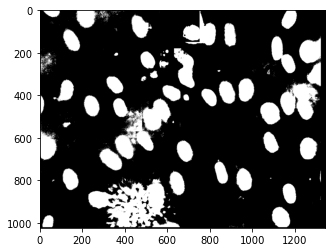

In [ ]:
figure()
imshow(b2,'gray')


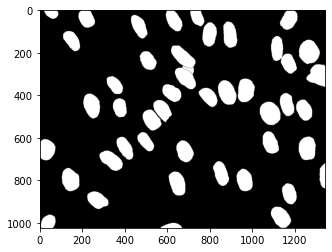

In [ ]:
figure()
imshow(a, 'gray')



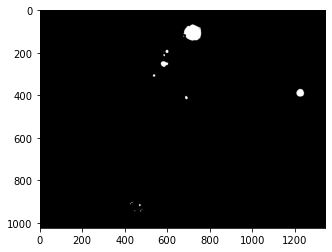

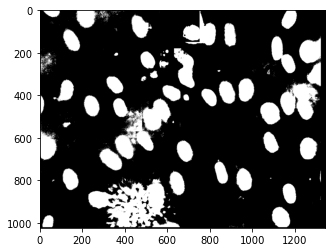

In [ ]:
b3 = otsu.otsu_thresholding(img_1, 256)
imshow(b3, 'gray')
figure()
imshow(b2, 'gray')

In [ ]:
print(dice(a,b2))
from images_segmentation import dicescore as dsc
gt = [a,a]
pt = [b2,b3]
print(dsc.f_dice(0,gt,pt))
print(dsc.b_dice(0,gt,pt))
print(dice(a,b3))
print(dsc.f_dice(1,gt,pt))
print(dsc.b_dice(1,gt,pt))


0.7556826370638715
0.7556826370638715
0.9373150245173119
0.0
0.0
0.8952390126429861
